## Applied Machine Learning Homework 3 Task 1

Peter Grantcharov (pdg2116), Po-Chieh Liu (pl2441)

**The overall goal is to predict whether a payment by a company to a medical doctor or facility was made as part of a research project or not.**

In [1]:
# import base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Task 1 Identify Features
Assemble a dataset consisting of features and target (for example in a dataframe or in two arrays X and y). 
1. What features are relevant for the prediction task? 
2. What features should be excluded because they leak the target information? 
3. Show visualizations or statistics to support your selection.

## Before Start
The README file and variable description file were downloaded from www.CMS.gov, leading us to the following observations:

1. All transactions in file 1 (OP_DTL_GNRL_PGYR2017_P01182019.csv) should be labeled 0 (not part of research project), and all transactions in file 2 (OP_DTL_RSRCH_PGYR2017_P01182019.csv) should be labeded 1.
2. File 3 and file 4 are not related to build model.
3. The variable description file allowed us to identify features that we deemed valuable for this classification problem under the following criteria:

#### Rules for dropping features:
1. Since we want to model if the transaction is research related, we have to exclude all non-shared features between file 1 and 2. 
2. Exclude features that have unique values exist in either file 1 or file 2.
3. Exclude if feature doesn't have contain information regarding the transaction. For example, **Change_Type** is just marking the row is new/added/changed/unchanged, which should be dropped.
4. Exclude features that are too specific (e.g. **Recipient_Postal_Code**) too detailed (e.g. **Physician_Specialty**), or cannot be generalized (e.g. **Physician_Profile_ID**)
5. Exclude features that can be represented by other features.

## Data Exploration

#### Import files

In [2]:
# File 1 are all labeld 0, and File 2 are all labeled 1
file1 = pd.read_csv('OP_DTL_GNRL_PGYR2017_P01182019.csv')
file2 = pd.read_csv('OP_DTL_RSRCH_PGYR2017_P01182019.csv')

# check duplicated record based on Record_ID
print('Number of duplicated record: ' + 
      str(file1.Record_ID.append(file2.Record_ID).duplicated().sum()))
file1.drop(['Record_ID'], inplace = True, axis = 1)
file2.drop(['Record_ID'], inplace = True, axis = 1)


Number of duplicated record: 0


#### Remove non-shared columns

In [3]:
# find non-shared features
set_1 = set(file1.columns)
set_2 = set(file2.columns)
col1_d = set_1.difference(set_2)
col2_d = set_2.difference(set_1)

# drop
file1.drop(col1_d, axis = 1, inplace = True)
file2.drop(col2_d, axis = 1, inplace = True)

#### Check rest features

In [4]:
# print rest features
print('Number of remaining features:\t' + str(len(file1.columns)))
for el in file1.columns:
    print(el)

Number of remaining features:	63
Change_Type
Covered_Recipient_Type
Teaching_Hospital_CCN
Teaching_Hospital_ID
Teaching_Hospital_Name
Physician_Profile_ID
Physician_First_Name
Physician_Middle_Name
Physician_Last_Name
Physician_Name_Suffix
Recipient_Primary_Business_Street_Address_Line1
Recipient_Primary_Business_Street_Address_Line2
Recipient_City
Recipient_State
Recipient_Zip_Code
Recipient_Country
Recipient_Province
Recipient_Postal_Code
Physician_Primary_Type
Physician_Specialty
Physician_License_State_code1
Physician_License_State_code2
Physician_License_State_code3
Physician_License_State_code4
Physician_License_State_code5
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country
Total_Amount_of_Payment_USDollars
Date_of_Payment
Form

#### Remove non-relavent or correlated features

In [5]:
# not related to y
col_ = ['Change_Type', 'Payment_Publication_Date', 'Program_Year'] 
# Represented by Teaching_Hospital_ID and Physician_Profile_ID
col_.extend(['Teaching_Hospital_CCN',
             'Teaching_Hospital_Name',
             'Physician_First_Name',
             'Physician_Middle_Name',
             'Physician_Last_Name',
             'Physician_Name_Suffix'])
# represented by Recipient_City, Recipient_State, 'Recipient_Province', Recipient_Country
col_.extend(['Recipient_Primary_Business_Street_Address_Line1',
             'Recipient_Primary_Business_Street_Address_Line2',
             'Recipient_Zip_Code',
             'Recipient_Postal_Code'])
# represented by Physician_Profile_ID
col_.extend(['Physician_License_State_code1',
             'Physician_License_State_code2',
             'Physician_License_State_code3',
             'Physician_License_State_code4',
             'Physician_License_State_code5'])
# represented by Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID
col_.extend(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
             'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
             'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
             'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country'])

In [6]:
file1.drop(col_, axis = 1, inplace = True)
file2.drop(col_, axis = 1, inplace = True)

In [7]:
print('Number of remaining features:\t' + str(len(file1.columns)))
for el in file1.columns:
    print(el)

Number of remaining features:	41
Covered_Recipient_Type
Teaching_Hospital_ID
Physician_Profile_ID
Recipient_City
Recipient_State
Recipient_Country
Recipient_Province
Physician_Primary_Type
Physician_Specialty
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID
Total_Amount_of_Payment_USDollars
Date_of_Payment
Form_of_Payment_or_Transfer_of_Value
Delay_in_Publication_Indicator
Dispute_Status_for_Publication
Related_Product_Indicator
Covered_or_Noncovered_Indicator_1
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
Product_Category_or_Therapeutic_Area_1
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1
Associated_Drug_or_Biological_NDC_1
Covered_or_Noncovered_Indicator_2
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2
Product_Category_or_Therapeutic_Area_2
Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2
Associated_Drug_or_Biological_NDC_2
Covered_or_Noncovered_Indicator_3
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3
Product_Category

#### Add Labels and Construct Data Frame

In [8]:
# Labeling
file1['y'] = int(0)
file2['y'] = int(1)

# combine (vertical stack)
df = pd.concat([file1, file2], sort = False)

# check shape consistancy
print(file1.shape)
print(file2.shape)
print(df.shape)

# display data head
df.head()

(10663833, 42)
(602530, 42)
(11266363, 42)


,Covered_Recipient_Type,Teaching_Hospital_ID,Physician_Profile_ID,Recipient_City,Recipient_State,Recipient_Country,Recipient_Province,Physician_Primary_Type,Physician_Specialty,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,...,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,y
0,Covered Recipient Physician,NaN,326860.0,HUNTINGTON,WV,United States,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,100000000186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Covered Recipient Physician,NaN,604392.0,Dallas,TX,United States,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,100000000186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Covered Recipient Physician,NaN,326860.0,HUNTINGTON,WV,United States,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,100000000186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Covered Recipient Physician,NaN,326860.0,HUNTINGTON,WV,United States,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,100000000186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Covered Recipient Physician,NaN,1307901.0,HOUSTON,TX,United States,NaN,Medical Doctor,Allopathic & Osteopathic Physicians|General Pr...,100000000186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
# free memory
del col_, set_1, set_2, col1_d, col2_d

#### Relative Label Counts

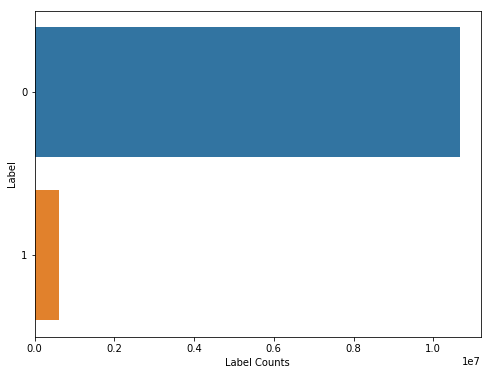

In [10]:
f0, ax0 = plt.subplots(figsize= (8,6))
ax0 = sns.countplot(y='y', data = df)
_ = ax0.set(xlabel = 'Label Counts', ylabel = 'Label')


From figure, we can see that this is a highly **imbalanced** data set, which we will take into consideration for evaluating features and for selecting **metrics** by which to evaluate our model.

#### Covered_Recipient_Type

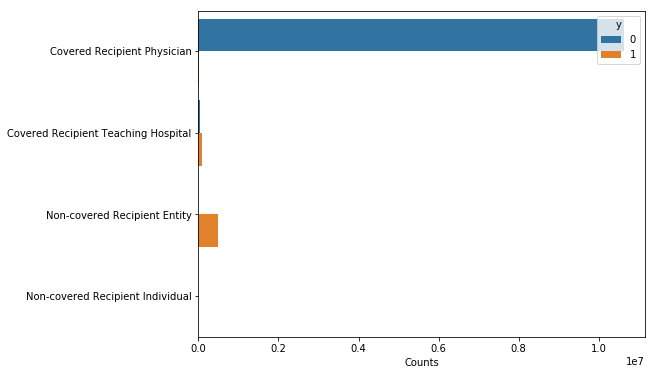

In [11]:
f1, ax1 = plt.subplots(figsize= (8,6))
ax1 = sns.countplot(y='Covered_Recipient_Type', hue = 'y', data = df)
_ = ax1.set(xlabel = 'Counts', ylabel = '')

In [12]:
print('Number of Covered_Recipient_Type exist in both files: ' + 
      str(len(set(file1.Covered_Recipient_Type.unique()).intersection(file2.Covered_Recipient_Type.unique()))))
print('Number of Covered_Recipient_Type only exist in file 1: ' + 
      str(len(set(file1.Covered_Recipient_Type.unique()).difference(file2.Covered_Recipient_Type.unique()))))
print('Number of Covered_Recipient_Type only exist in file 2: ' + 
      str(len(set(file2.Covered_Recipient_Type.unique()).difference(file1.Covered_Recipient_Type.unique()))))

Number of Covered_Recipient_Type exist in both files: 2
Number of Covered_Recipient_Type only exist in file 1: 0
Number of Covered_Recipient_Type only exist in file 2: 2


In [13]:
file2[file2.Covered_Recipient_Type == 'Non-covered Recipient Individual'].head()

,Covered_Recipient_Type,Teaching_Hospital_ID,Physician_Profile_ID,Recipient_City,Recipient_State,Recipient_Country,Recipient_Province,Physician_Primary_Type,Physician_Specialty,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,...,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Delay_in_Publication_Indicator,Dispute_Status_for_Publication,y
151632,Non-covered Recipient Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000011162,...,NaN,NaN,NaN,NaN,9000.00,03/13/2017,Cash or cash equivalent,No,No,1
152592,Non-covered Recipient Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000005736,...,NaN,NaN,NaN,NaN,1200.00,08/31/2017,Cash or cash equivalent,No,No,1
159274,Non-covered Recipient Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000010610,...,NaN,NaN,NaN,NaN,5042.00,01/31/2017,Cash or cash equivalent,No,No,1
161721,Non-covered Recipient Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000005676,...,NaN,NaN,NaN,NaN,2351.25,06/07/2017,Cash or cash equivalent,No,No,1
239572,Non-covered Recipient Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000000081,...,NaN,NaN,NaN,NaN,6000.00,10/03/2017,Cash or cash equivalent,No,No,1


In [14]:
file2[file2.Covered_Recipient_Type == 'Non-covered Recipient Entity'].head()

,Covered_Recipient_Type,Teaching_Hospital_ID,Physician_Profile_ID,Recipient_City,Recipient_State,Recipient_Country,Recipient_Province,Physician_Primary_Type,Physician_Specialty,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,...,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Total_Amount_of_Payment_USDollars,Date_of_Payment,Form_of_Payment_or_Transfer_of_Value,Delay_in_Publication_Indicator,Dispute_Status_for_Publication,y
114512,Non-covered Recipient Entity,NaN,NaN,San Antonio,TX,United States,NaN,NaN,NaN,100000010400,...,NaN,NaN,NaN,NaN,211.95,12/22/2017,Cash or cash equivalent,No,No,1
114513,Non-covered Recipient Entity,NaN,NaN,Munster,IN,United States,NaN,NaN,NaN,100000010400,...,NaN,NaN,NaN,NaN,500.00,04/20/2017,Cash or cash equivalent,No,No,1
114514,Non-covered Recipient Entity,NaN,NaN,Munster,IN,United States,NaN,NaN,NaN,100000010400,...,NaN,NaN,NaN,NaN,500.00,07/27/2017,Cash or cash equivalent,No,No,1
114515,Non-covered Recipient Entity,NaN,NaN,Munster,IN,United States,NaN,NaN,NaN,100000010400,...,NaN,NaN,NaN,NaN,500.00,10/26/2017,Cash or cash equivalent,No,No,1
114516,Non-covered Recipient Entity,NaN,NaN,West Palm Beach,FL,United States,NaN,NaN,NaN,100000010400,...,NaN,NaN,NaN,NaN,3500.00,11/02/2017,Cash or cash equivalent,No,No,1


We can found there are two types of Non-covered Recipient Entities that only exist in file 2 (label 1), which means inclusion of this feature will be an information leak. If we use this feature, our model will be unrealistically accurate, and as such, we will drop this column.

In [15]:
# drop col
drop_col = ['Covered_Recipient_Type']

#### Teaching_Hospital_ID

Upon further consideration of what this feature actually means, we think it will be best to exclude this feature for the following reasons:

1. We will need to convert this to a categorical variable, as the integer representation of Hospital IDhas no relation to actual numbers. As such, One-Hot Encoding this feature, for example, will cause the feature space to blow up, which we would like to avoid. 

2. New hospitals may appear, which our model (if feature is included) will not be able to deal with.


In [16]:
drop_col.append('Teaching_Hospital_ID')

#### Physician_Profile_ID

In [17]:
print('Number of Physician_Profile_ID exist in both files: ' + 
      str(len(set(file1.Physician_Profile_ID.unique()).intersection(file2.Physician_Profile_ID.unique()))))
print('Number of Physician_Profile_ID only exist in file 1: ' + 
      str(len(set(file1.Physician_Profile_ID.unique()).difference(file2.Physician_Profile_ID.unique()))))
print('Number of Physician_Profile_ID only exist in file 2: ' + 
      str(len(set(file2.Physician_Profile_ID.unique()).difference(file1.Physician_Profile_ID.unique()))))

Number of Physician_Profile_ID exist in both files: 5350
Number of Physician_Profile_ID only exist in file 1: 619272
Number of Physician_Profile_ID only exist in file 2: 727


For the same reasons outlined above, we will also exclude Physician_Profile_ID. There is an even greater quantity of physicians (over half a million), and an even greater rate of new physicians appearing, therefore making inclusion of this feature unnecessary and expensive.

In [18]:
drop_col.append('Physician_Profile_ID')

#### Recipient Country, Province, State and City

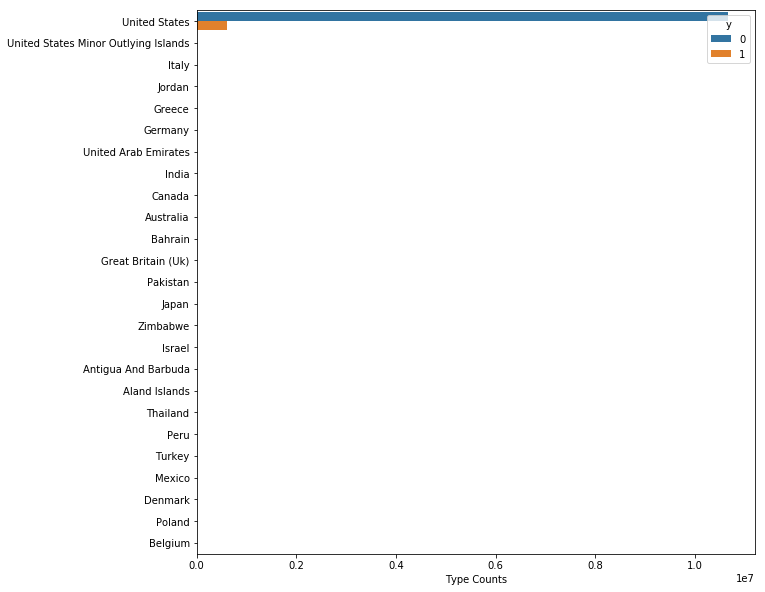

In [19]:
f4, ax4 = plt.subplots(figsize= (10,10))
ax4 = sns.countplot(y='Recipient_Country', hue = 'y', data = df)
_ = ax4.set(xlabel = 'Type Counts', ylabel = '')

Initially appears to be a useless feature, but we will try to plot on a logarithmic scale to see if it reveals anything:

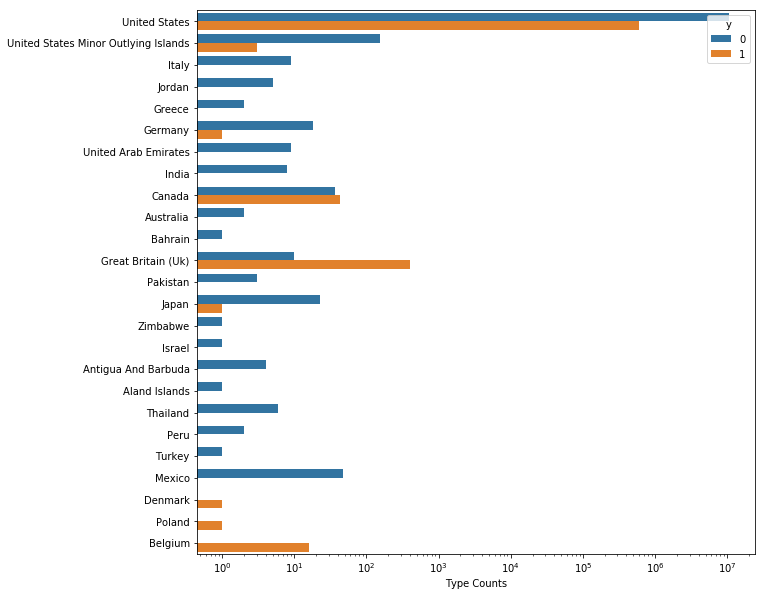

In [20]:
f4, ax4 = plt.subplots(figsize= (10,10))
ax4 = sns.countplot(y='Recipient_Country', hue = 'y', data = df)
_ = ax4.set(xlabel = 'Type Counts', ylabel = '')
_ = ax4.set(xscale = 'log')

In [21]:
print(df.Recipient_Country[ (df.y == 0) ].value_counts(dropna = False) / 
      df.y.value_counts()[0])

United States                           9.999678e-01
United States Minor Outlying Islands    1.434756e-05
Mexico                                  4.407421e-06
Canada                                  3.469672e-06
Japan                                   2.156823e-06
Germany                                 1.687948e-06
Great Britain (Uk)                      9.377491e-07
Italy                                   8.439742e-07
United Arab Emirates                    8.439742e-07
India                                   7.501993e-07
Thailand                                5.626495e-07
Jordan                                  4.688746e-07
Antigua And Barbuda                     3.750996e-07
Pakistan                                2.813247e-07
Greece                                  1.875498e-07
Peru                                    1.875498e-07
Australia                               1.875498e-07
Aland Islands                           9.377491e-08
Bahrain                                 9.3774

In [22]:
print(df.Recipient_Country[ (df.y == 1) ].value_counts(dropna = False) / 
      df.y.value_counts()[1])

United States                           0.998151
NaN                                     0.001067
Great Britain (Uk)                      0.000672
Canada                                  0.000071
Belgium                                 0.000027
United States Minor Outlying Islands    0.000005
Denmark                                 0.000002
Japan                                   0.000002
Poland                                  0.000002
Germany                                 0.000002
Name: Recipient_Country, dtype: float64


In absolute scale, we can find almost all transactions are in the United States, but with a log scale, we see that the higher proportion of research payments reported outside the United States may make this feature helpful, even if only about 2 in 1000 transactions occur outside of the US. We can reduce the unique values to 'United States' and 'Others' for more generalizable model.

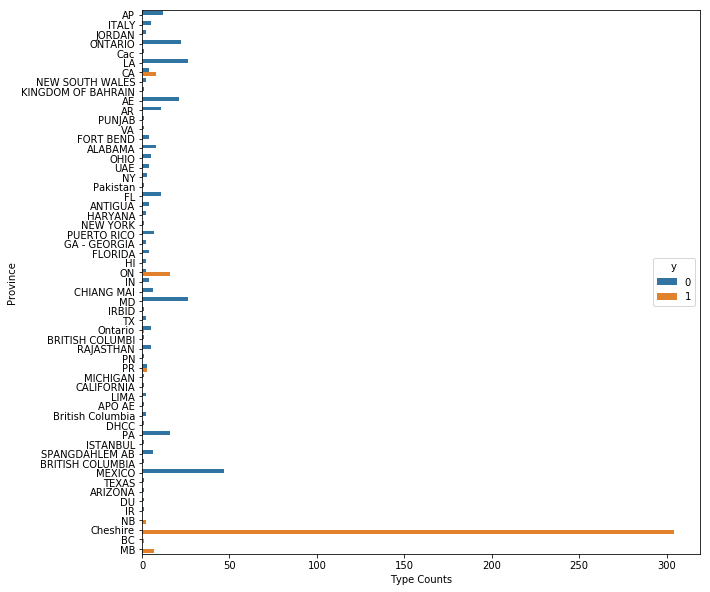

In [23]:
f4, ax4 = plt.subplots(figsize= (10,10))
ax4 = sns.countplot(y='Recipient_Province', hue = 'y', data = df)
_ = ax4.set(xlabel = 'Type Counts', ylabel = 'Province')


There are relatively few data points with province values included, and further, there is a lot of inconsitancy in how province values are written. For example, this has both "FLORIDA" and "FL", "ONTARIO" and "ON", etc. We considered using this feature just for imputing a missing country entry, but decided for simplicity to simply exclude it.

In [24]:
drop_col.append('Recipient_Province')

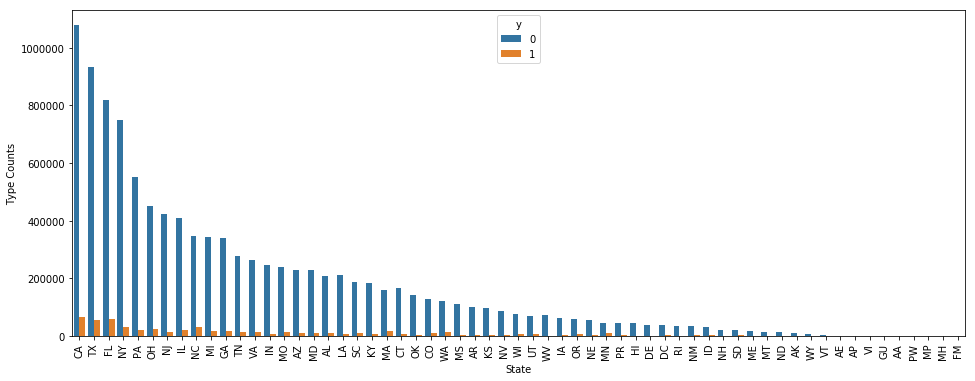

In [25]:
f4, ax4 = plt.subplots(figsize= (16,6))
ax4 = sns.countplot(x='Recipient_State', hue = 'y', data = df,
                    order=df['Recipient_State'].value_counts().index)
_ = ax4.set(ylabel = 'Type Counts', xlabel = 'State')
_ = plt.xticks(rotation = 'vertical')

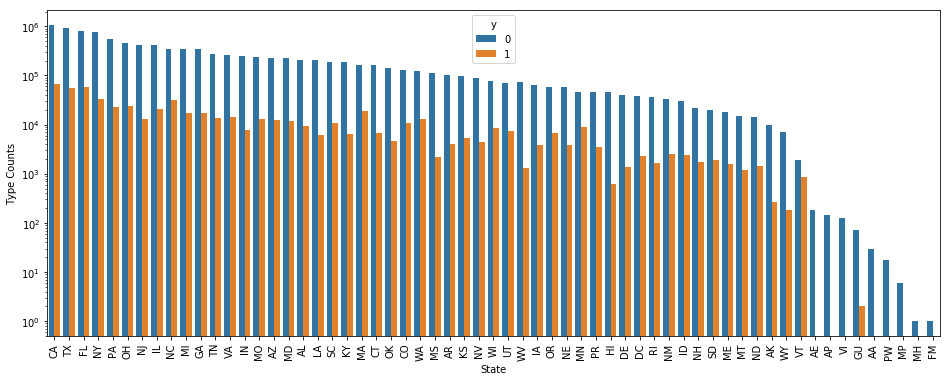

In [26]:
f4, ax4 = plt.subplots(figsize= (16,6))
ax4 = sns.countplot(x='Recipient_State', hue = 'y', data = df,
                   order=df['Recipient_State'].value_counts().index)
_ = ax4.set(ylabel = 'Type Counts', xlabel = 'State')
_ = plt.xticks(rotation = 'vertical')
_ = ax4.set(yscale = 'log')

**Recipient_State** might be a good predictor when coupled with country. But there are 62 states here, so it should be noted that some states are outside of the US.

In [27]:
cities = len(set(df.Recipient_City))
print("There are {} unique cities".format(cities))

There are 20881 unique cities


**Recipient_City** has too many unique values to use.

In [28]:
drop_col.append('Recipient_City')

#### Physician Primary Type

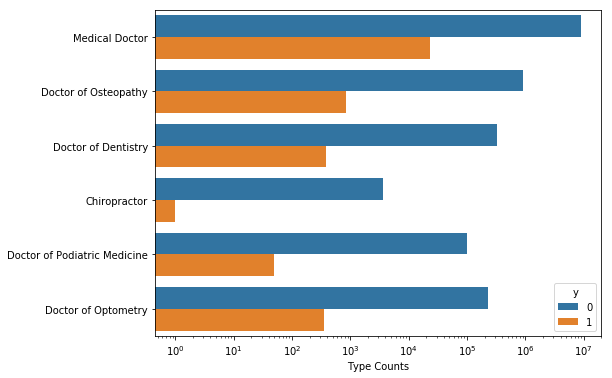

In [29]:
f5, ax5 = plt.subplots(figsize= (8,6))
ax5 = sns.countplot(y='Physician_Primary_Type', hue = 'y', data = df)
_ = ax5.set(xlabel = 'Type Counts', ylabel = '')
_ = ax5.set(xscale = 'log')

In [30]:
print(df.Physician_Primary_Type[ (df.y == 0) & ~(df.Physician_Profile_ID.isnull()) ].value_counts(dropna = False) / 
      df.y.value_counts()[0])

Medical Doctor                  0.848597
Doctor of Osteopathy            0.086043
Doctor of Dentistry             0.030475
Doctor of Optometry             0.021294
Doctor of Podiatric Medicine    0.009343
Chiropractor                    0.000333
Name: Physician_Primary_Type, dtype: float64


In [31]:
print(df.Physician_Primary_Type[ (df.y == 1) & ~(df.Physician_Profile_ID.isnull()) ].value_counts(dropna = False) / 
      df.y.value_counts()[1])

Medical Doctor                  0.038455
Doctor of Osteopathy            0.001422
Doctor of Dentistry             0.000634
Doctor of Optometry             0.000591
Doctor of Podiatric Medicine    0.000081
Chiropractor                    0.000002
Name: Physician_Primary_Type, dtype: float64


From the plot, we can see that the differences in the Research to Non-research transactions between different **Physician_Primary_Type** is quite pronounced, so this will be a good pridictor for the model.

#### Physician Specialty

428


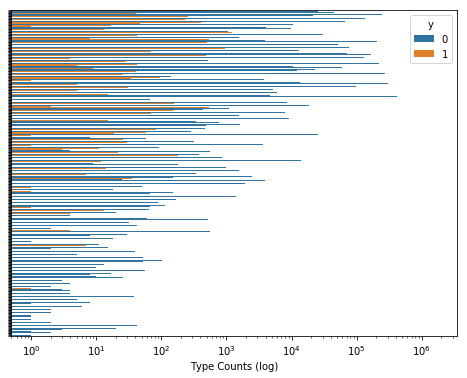

In [32]:
print(len(df.Physician_Specialty.unique()))
f6, ax6 = plt.subplots(figsize= (8,6))
ax6 = sns.countplot(y='Physician_Specialty', hue = 'y', data = df)
plt.tick_params(
    axis='y',          
    which='both',
    labelleft=False) 
_ = ax6.set(xlabel = 'Type Counts (log)', ylabel = '')
_ = ax6.set(xscale = 'log')


In [33]:
print('Number of Physician_Specialty exist in both files: ' + 
      str(len(set(file1.Physician_Specialty.unique()).intersection(file2.Physician_Specialty.unique()))))
print('Number of Physician_Specialty only exist in file 1: ' + 
      str(len(set(file1.Physician_Specialty.unique()).difference(file2.Physician_Specialty.unique()))))
print('Number of Physician_Specialty only exist in file 2: ' + 
      str(len(set(file2.Physician_Specialty.unique()).difference(file1.Physician_Specialty.unique()))))

Number of Physician_Specialty exist in both files: 176
Number of Physician_Specialty only exist in file 1: 252
Number of Physician_Specialty only exist in file 2: 0


In [34]:
df.Physician_Specialty.unique()[:15]

array(['Allopathic & Osteopathic Physicians|General Practice',
       'Allopathic & Osteopathic Physicians|Internal Medicine',
       'Allopathic & Osteopathic Physicians|Radiology|Radiation Oncology',
       'Allopathic & Osteopathic Physicians|Emergency Medicine',
       'Allopathic & Osteopathic Physicians|Surgery|Plastic and Reconstructive Surgery',
       'Allopathic & Osteopathic Physicians|Plastic Surgery',
       'Allopathic & Osteopathic Physicians|Obstetrics & Gynecology',
       'Allopathic & Osteopathic Physicians|Obstetrics & Gynecology|Gynecology',
       'Allopathic & Osteopathic Physicians|Obstetrics & Gynecology|Gynecologic Oncology',
       'Allopathic & Osteopathic Physicians|Dermatology',
       'Allopathic & Osteopathic Physicians|Ophthalmology',
       'Other Service Providers|Specialist',
       'Allopathic & Osteopathic Physicians|Surgery',
       'Dental Providers|Dentist|Oral and Maxillofacial Surgery',
       'Allopathic & Osteopathic Physicians|Thoracic Surg

From the plot, the differences in the label proportions between the different **Physician_Specialty** categories could be indicative that this us a good pridictor, however several facts make this feature problematic:

1. There are over 400 unique values, which would blow up the feature space if one-hot encoding
2. There seems to be very little consistency in how physician specialties are reported
2. There is significant overlap between physician specialties, which cannot be represented

Hence, we will remove this feature.

In [35]:
drop_col.append('Physician_Specialty')

#### Applicable Manufacturer or Applicable GPO Making Payment ID

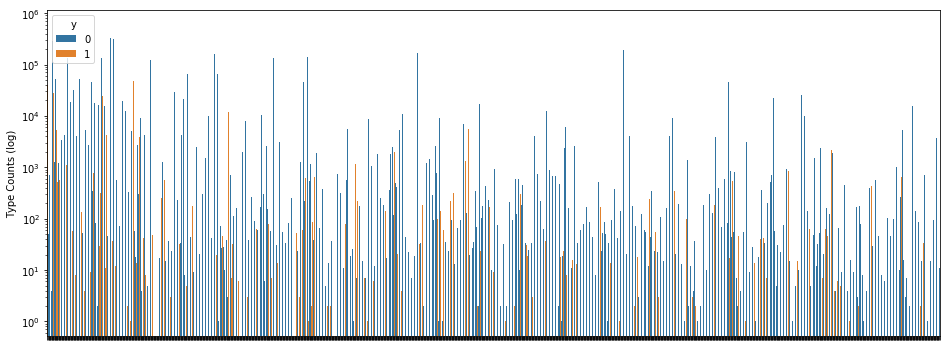

In [36]:
f7, ax7 = plt.subplots(figsize= (16,6))
ax7 = sns.countplot(x='Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID', 
                    hue = 'y', data = df)
_ = ax7.set(ylabel = 'Type Counts (log)', xlabel = '')
_ = ax7.set(yscale = 'log')
plt.tick_params(
    axis='x',          
    which='both',
    labelbottom=False)

In [37]:
print('Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID exist in both files: ' + 
      str(len(set(file1.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()).intersection(file2.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()))))
print('Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID only exist in file 1: ' + 
      str(len(set(file1.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()).difference(file2.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()))))
print('Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID only exist in file 2: ' + 
      str(len(set(file2.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()).difference(file1.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.unique()))))

Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID exist in both files: 515
Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID only exist in file 1: 948
Number of Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID only exist in file 2: 32


In [38]:
print("Number of null values: {}".format(df.Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID.isnull().sum()))

Number of null values: 0


In [39]:
drop_col.append('Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID')

**Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID** simply contains too many unique values for us to be able to use, and further, it will obviously not be generalizable.

#### Total Amount of Payment USDollars

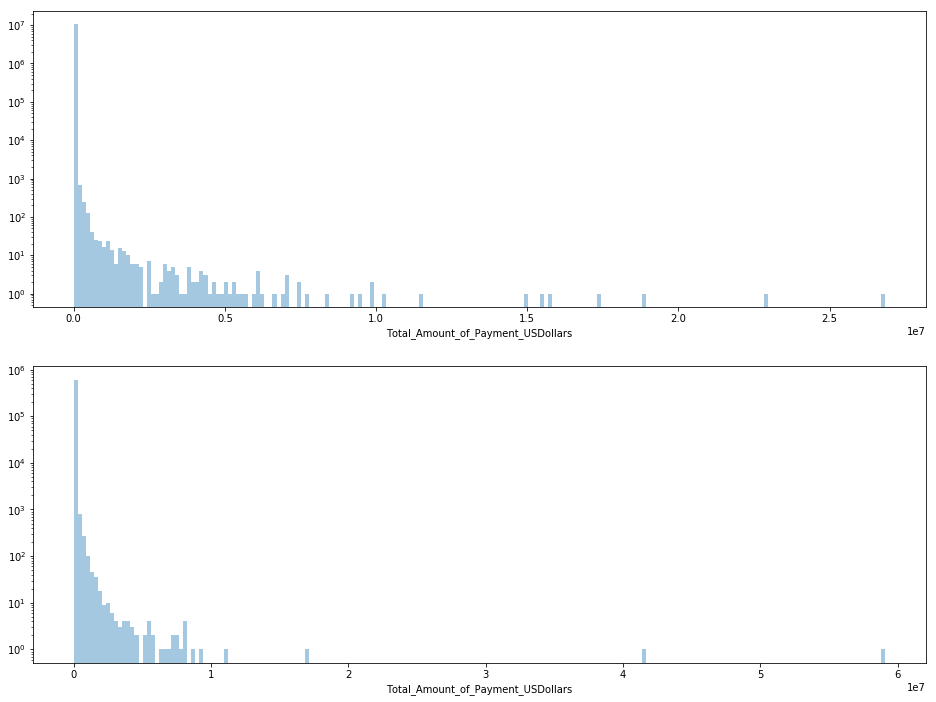

In [40]:
f8, ax8 = plt.subplots(2, 1, figsize= (16,12))
_ = sns.distplot(df[df['y'] == 0].Total_Amount_of_Payment_USDollars, 
                 bins = 200, ax = ax8[0], kde = False)
_ = ax8[0].set(yscale = 'log')
_ = sns.distplot(df[df['y'] == 1].Total_Amount_of_Payment_USDollars, 
                 bins = 200, ax = ax8[1], kde = False)
_ = ax8[1].set(yscale = 'log')

In [41]:
print("Number of missing values: {}".format(df.Total_Amount_of_Payment_USDollars.isnull().sum()))

Number of missing values: 0


There is no missing data of **Total_Amount_of_Payment_USDollars**, making this numerical variable easy to work with. We will obviously keep this feature.

#### Date of Payment
Note, all data points are in 2017, we can drop the year. Unique date number is 365, basically every signle day has payment record. Let's bin using month.

In [42]:
# convert to datatime type and reduce to month only
df['Date_of_Payment'] = pd.to_datetime(df.Date_of_Payment, format = "%m/%d/%Y")
df['Date_of_Payment'] = pd.DatetimeIndex(df['Date_of_Payment']).month

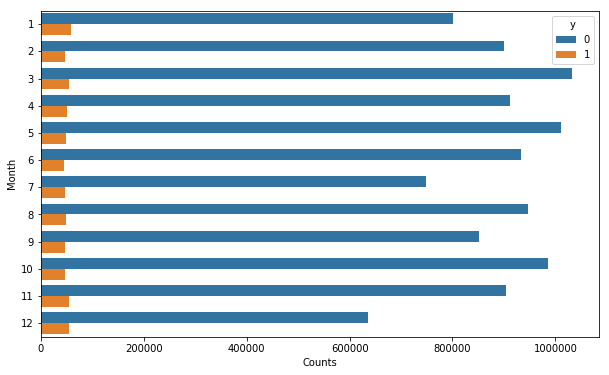

In [43]:
f10, ax10 = plt.subplots(figsize= (10,6))
ax10 = sns.countplot(y='Date_of_Payment', hue = 'y', data = df)
_ = ax10.set(xlabel = 'Counts', ylabel = 'Month')


There seems to be very little variation in target variable ratios between months, so we will drop this feature.

In [44]:
drop_col.append('Date_of_Payment')

#### Form_of_Payment_or_Transfer_of_Value

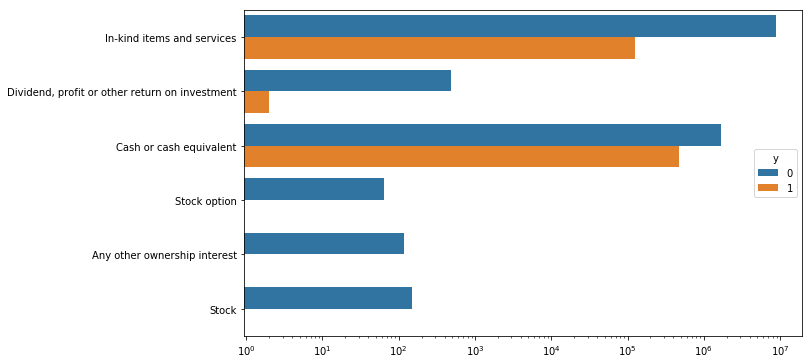

In [45]:
f11, ax11 = plt.subplots(figsize= (10,6))
ax11 = sns.countplot(y='Form_of_Payment_or_Transfer_of_Value', hue = 'y', data = df)
_ = ax11.set(xlabel = '', ylabel = '')
_ = ax11.set(xscale = 'log')

In [46]:
print('Number of Form_of_Payment_or_Transfer_of_Value exist in both files: ' + 
      str(len(set(file1.Form_of_Payment_or_Transfer_of_Value.unique()).intersection(
          file2.Form_of_Payment_or_Transfer_of_Value.unique()))))
print('Number of Form_of_Payment_or_Transfer_of_Value only exist in file 1: ' + 
      str(len(set(file1.Form_of_Payment_or_Transfer_of_Value.unique()).difference(
          file2.Form_of_Payment_or_Transfer_of_Value.unique()))))
print('Number of Form_of_Payment_or_Transfer_of_Value only exist in file 2: ' + 
      str(len(set(file2.Form_of_Payment_or_Transfer_of_Value.unique()).difference(
          file1.Form_of_Payment_or_Transfer_of_Value.unique()))))

Number of Form_of_Payment_or_Transfer_of_Value exist in both files: 3
Number of Form_of_Payment_or_Transfer_of_Value only exist in file 1: 3
Number of Form_of_Payment_or_Transfer_of_Value only exist in file 2: 0


In [47]:
print(df.Form_of_Payment_or_Transfer_of_Value[(df.y == 1)].value_counts(dropna = False) / 
      df.y.value_counts()[1])

Cash or cash equivalent                           0.790085
In-kind items and services                        0.209912
Dividend, profit or other return on investment    0.000003
Name: Form_of_Payment_or_Transfer_of_Value, dtype: float64


Even though there are three categories that only appear in **Form_of_Payment_or_Transfer_of_Value**, we still consider this a valuable feature because the top three categories in the plot appear in much greater quantities, and clearly serve as important predictors given the disparity between target variable proportions between the categories.

#### Delay_in_Publication_Indicator

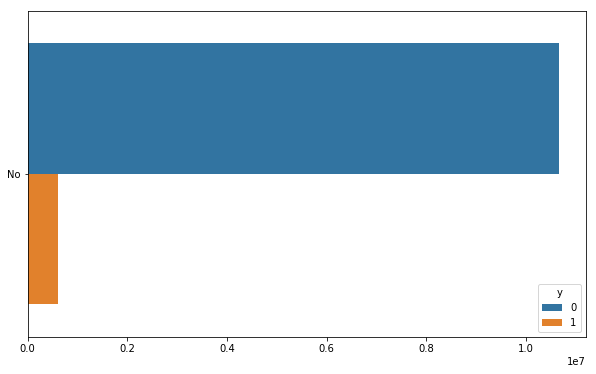

In [48]:
f12, ax12 = plt.subplots(figsize= (10,6))
ax12 = sns.countplot(y='Delay_in_Publication_Indicator', hue = 'y', data = df)
_ = ax12.set(xlabel = '', ylabel = '')


In [49]:
df.Delay_in_Publication_Indicator.isnull().sum()
df.Delay_in_Publication_Indicator.unique()

array(['No'], dtype=object)

As we can see, there is only one unique value in **Delay_in_Publication_Indicator**, rendering it useless for our classification problem. As such, we will drop this feature.

In [50]:
drop_col.append('Delay_in_Publication_Indicator')

#### Dispute_Status_for_Publication

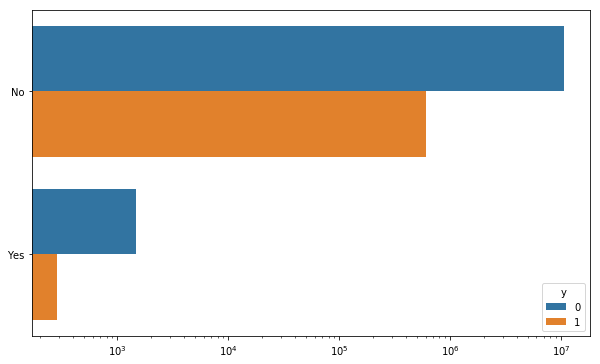

In [51]:
f13, ax13 = plt.subplots(figsize= (10,6))
ax13 = sns.countplot(y='Dispute_Status_for_Publication', hue = 'y', data = df)
_ = ax13.set(xlabel = '', ylabel = '')
_ = ax13.set(xscale = 'log')

In [52]:
print("Number of missing values: {}".format(df.Dispute_Status_for_Publication.isnull().sum()))

Number of missing values: 0


#### Related Product Indicator

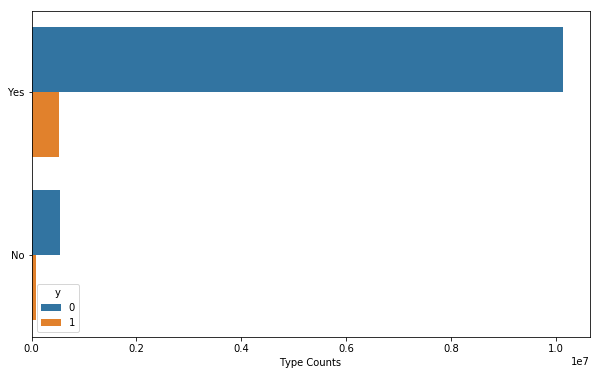

In [53]:
f14, ax14 = plt.subplots(figsize= (10,6))
ax14 = sns.countplot(y='Related_Product_Indicator', hue = 'y', data = df)
_ = ax14.set(xlabel = 'Type Counts', ylabel = '')

In [54]:
print("Number of missing values: {}".format(df.Related_Product_Indicator.isnull().sum()))

Number of missing values: 0


#### Covered or Noncovered Indicator


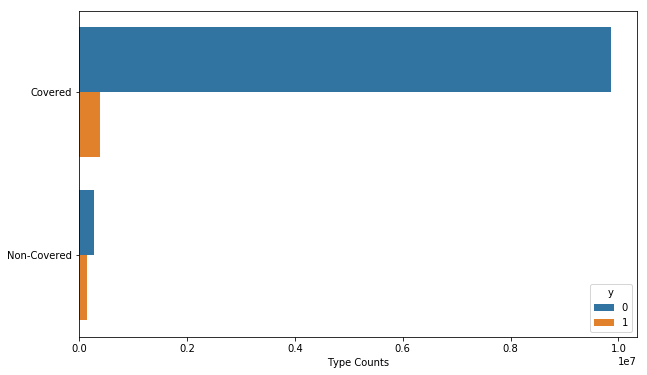

In [55]:
f15, ax15 = plt.subplots(figsize= (10,6))
ax15 = sns.countplot(y='Covered_or_Noncovered_Indicator_1', hue = 'y', data = df)
_ = ax15.set(xlabel = 'Type Counts', ylabel = '')

In [56]:
print(df.Covered_or_Noncovered_Indicator_1[ (df.y == 0) & (df.Related_Product_Indicator == 'Yes')].value_counts(dropna = False) / 
      df.y.value_counts()[0])


Covered        9.241863e-01
Non-Covered    2.567651e-02
NaN            9.377491e-08
Name: Covered_or_Noncovered_Indicator_1, dtype: float64


In [57]:
print(df.Covered_or_Noncovered_Indicator_1[ (df.y == 1) & (df.Related_Product_Indicator == 'Yes')].value_counts(dropna = False) / 
      df.y.value_counts()[1])

Covered        0.630682
Non-Covered    0.235295
Name: Covered_or_Noncovered_Indicator_1, dtype: float64


#### Indicate Drug or Biological or Device or Medical Supply 1

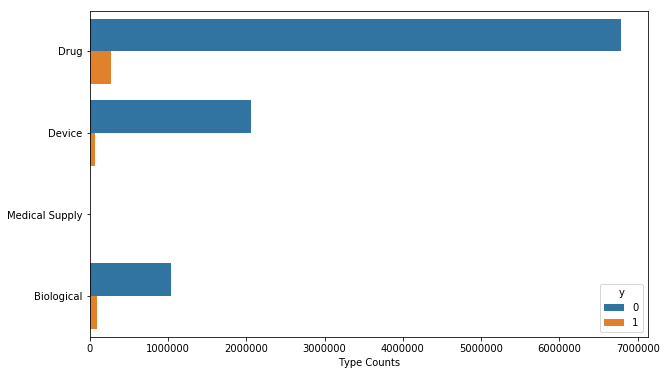

In [58]:
f16, ax16 = plt.subplots(figsize= (10,6))
ax16 = sns.countplot(y='Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', hue = 'y', data = df)
_ = ax16.set(xlabel = 'Type Counts', ylabel = '')

In [59]:
print(df.Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1[ (df.y == 0) & (df.Related_Product_Indicator == 'Yes')].value_counts(dropna = False) / 
      df.y.value_counts()[0])

Drug              0.636632
Device            0.193746
Biological        0.097990
NaN               0.020739
Medical Supply    0.000756
Name: Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1, dtype: float64


In [60]:
print(df.Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1[ (df.y == 1) & (df.Related_Product_Indicator == 'Yes')].value_counts(dropna = False) / 
      df.y.value_counts()[1])

Drug              0.449083
NaN               0.161399
Biological        0.145336
Device            0.109995
Medical Supply    0.000164
Name: Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1, dtype: float64


#### Product Category or Therapeutic Area 1

2173


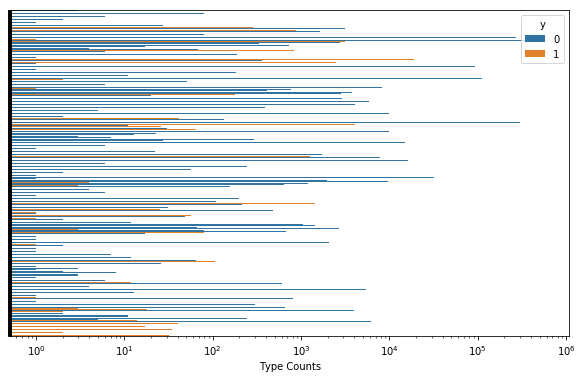

In [61]:
print(len(df.Product_Category_or_Therapeutic_Area_1.unique()))
f17, ax17 = plt.subplots(figsize= (10,6))
ax17 = sns.countplot(y='Product_Category_or_Therapeutic_Area_1', hue = 'y', data = df)
_ = ax17.set(xlabel = 'Type Counts', ylabel = '')
_ = ax17.set(xscale = 'log')
plt.tick_params(
    axis='y',          
    which='both',
    labelleft=False)

In [62]:
print('Number of Product_Category_or_Therapeutic_Area_1 exist in both files: ' + 
      str(len(set(file1.Product_Category_or_Therapeutic_Area_1.unique()).intersection(
          file2.Product_Category_or_Therapeutic_Area_1.unique()))))
print('Number of Product_Category_or_Therapeutic_Area_1 only exist in file 1: ' + 
      str(len(set(file1.Product_Category_or_Therapeutic_Area_1.unique()).difference(
          file2.Product_Category_or_Therapeutic_Area_1.unique()))))
print('Number of Product_Category_or_Therapeutic_Area_1 only exist in file 2: ' + 
      str(len(set(file2.Product_Category_or_Therapeutic_Area_1.unique()).difference(
          file1.Product_Category_or_Therapeutic_Area_1.unique()))))

Number of Product_Category_or_Therapeutic_Area_1 exist in both files: 593
Number of Product_Category_or_Therapeutic_Area_1 only exist in file 1: 1486
Number of Product_Category_or_Therapeutic_Area_1 only exist in file 2: 94


In [63]:
print((df.groupby('Product_Category_or_Therapeutic_Area_1').size()).sort_values(ascending=False)[:10])
print((df.groupby('Product_Category_or_Therapeutic_Area_1').size()).sort_values(ascending=False)[-10:])

Product_Category_or_Therapeutic_Area_1
Diabetes                         572969
RESPIRATORY                      448862
Cardiovascular & Metabolism      435761
DIABETES                         352366
Immunology                       349834
CARDIOVASCULAR                   336615
NEUROSCIENCE                     301894
Cardiovascular and Metabolism    270123
Oncology                         265595
GASTROENTEROLOGY                 259236
dtype: int64
Product_Category_or_Therapeutic_Area_1
Internal Medicine Rheumatology                                                                   1
Internal                                                                                         1
Immunoenzymatic                                                                                  1
Inservice Hely & Weber Bracing                                                                   1
Inhalation Therapy                                                                               1
In-Vitro Diagn

The missing rate is too high, there are too many unique values, there are too many inconsistencies in reporting the product category, and the model will be unable to predict unseen categories. Therefore we will drop these features. 

In [64]:
drop_col.extend(['Product_Category_or_Therapeutic_Area_1',
                 'Product_Category_or_Therapeutic_Area_2',
                 'Product_Category_or_Therapeutic_Area_3',
                 'Product_Category_or_Therapeutic_Area_4',
                 'Product_Category_or_Therapeutic_Area_5'])

In [65]:
print(df.Product_Category_or_Therapeutic_Area_1[ (df.y == 1) & (df.Related_Product_Indicator == 'No')].value_counts(dropna = False) / 
      df.y.value_counts()[1])

NaN    0.134023
Name: Product_Category_or_Therapeutic_Area_1, dtype: float64


#### Name of Drug or Biological or Device or Medical Supply 1

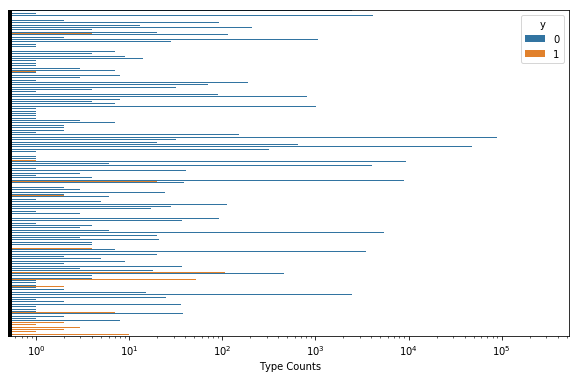

In [66]:
f18, ax18 = plt.subplots(figsize= (10,6))
ax18 = sns.countplot(y='Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', hue = 'y', data = df)
_ = ax18.set(xlabel = 'Type Counts', ylabel = '')
_ = ax18.set(xscale = 'log')
plt.tick_params(
    axis='y',          
    which='both',
    labelleft=False)

In [67]:
print('Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 exist in both files: ' + 
      str(len(set(file1.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()).intersection(
          file2.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()))))
print('Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 only exist in file 1: ' + 
      str(len(set(file1.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()).difference(
          file2.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()))))
print('Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 only exist in file 2: ' + 
      str(len(set(file2.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()).difference(
          file1.Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1.unique()))))

Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 exist in both files: 1534
Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 only exist in file 1: 11444
Number of Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 only exist in file 2: 585


For the same reasons as those outlined under **Product_Category_or_Therapeutic_Area**, we will also drop **Name_of_Drug_or_Biological_or_Device_or_Medical_Supply**.

In [68]:
drop_col.extend(['Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
                 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
                 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
                 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
                 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5'])

#### Associated Drug or Biological NDC 1
After consulting a medical school student, the NDC code can be replaced by **Name_of_Drug_or_Biological_or_Device_or_Medical_Supply**, a previously analyzed feature. Drugs might also have multiple NDC codes (different size packing...etc), providing another reason that it will be worthwhile to drop this feature.

In [69]:
drop_col.extend(['Associated_Drug_or_Biological_NDC_1',
                 'Associated_Drug_or_Biological_NDC_2',
                 'Associated_Drug_or_Biological_NDC_3',
                 'Associated_Drug_or_Biological_NDC_4',
                 'Associated_Drug_or_Biological_NDC_5'])

#### **Related_Product_Indicator** and **Covered_or_Noncovered_Indicator**


In [70]:
print('Number of missing values in Related_Product_Indicator: {}'.format(sum(df.Related_Product_Indicator.isnull())))

Number of missing values in Related_Product_Indicator: 0


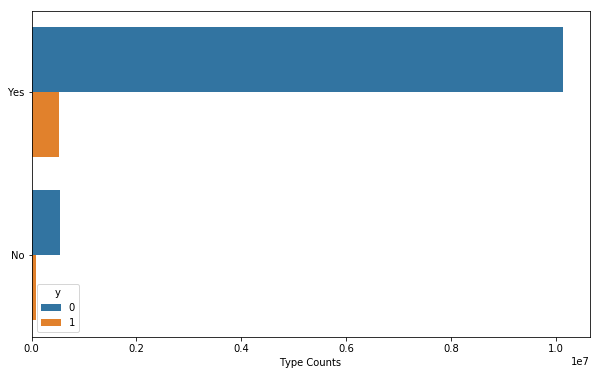

In [71]:
f19, ax19 = plt.subplots(figsize= (10,6))
ax19 = sns.countplot(y='Related_Product_Indicator', hue = 'y', data = df)
_ = ax19.set(xlabel = 'Type Counts', ylabel = '')

On the surface, **Related_Product_Indicator** doesn't stand out as an exceptional predictor, but there are no reasons for concern, and its binary nature is easy to work with, and hence, we will keep it.

In [72]:
cats = [x for x in df.columns if x.startswith('Covered_or_Noncovered_Indicator')]
for cat in cats:
    na_prop = sum(df[cat].isnull()) / len(df)
    print("{t} Missing Proportion: {v}".format(t=cat, v=na_prop))


Covered_or_Noncovered_Indicator_1 Missing Proportion: 0.0546234840826627
Covered_or_Noncovered_Indicator_2 Missing Proportion: 0.7971937350145739
Covered_or_Noncovered_Indicator_3 Missing Proportion: 0.9192382670432331
Covered_or_Noncovered_Indicator_4 Missing Proportion: 0.9768675126125441
Covered_or_Noncovered_Indicator_5 Missing Proportion: 0.9933031626976692


Because of the quantity of missing values in indicators 2, 3, 4, and 5, we will drop these four features, and only keep **Covered_or_Noncovered_Indicator_1**.

In [73]:
drop_col.extend(['Covered_or_Noncovered_Indicator_2',
                 'Covered_or_Noncovered_Indicator_3',
                 'Covered_or_Noncovered_Indicator_4',
                 'Covered_or_Noncovered_Indicator_5'])

#### Indicate_Drug_or_Biological_or_Device_or_Medical_Supply

In [74]:
cats = [x for x in df.columns if x.startswith('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply')]
for cat in cats:
    na_prop = sum(df[cat].isnull()) / len(df)
    print("{t} Missing Proportion: {v}".format(t=cat, v=na_prop))


Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1 Missing Proportion: 0.08288486710396248
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2 Missing Proportion: 0.8017288276615976
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3 Missing Proportion: 0.9211127850221051
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4 Missing Proportion: 0.9772273447961867
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Missing Proportion: 0.993478019481531


Because of the quantity of missing values in indicators 2, 3, 4, and 5, we will also drop these four features, and only keep **Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1**.

In [75]:
drop_col.extend(['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
                 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
                 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
                 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'])

#### Drop features

In [76]:
df.drop(drop_col, axis = 1, inplace = True)

#### Remaining Features:

In [77]:
for el in df.columns: print(el)

Recipient_State
Recipient_Country
Physician_Primary_Type
Total_Amount_of_Payment_USDollars
Form_of_Payment_or_Transfer_of_Value
Dispute_Status_for_Publication
Related_Product_Indicator
Covered_or_Noncovered_Indicator_1
Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
y


#### Missing value
All plots automatically drop the missing values. Now we check the missing value of each features.

In [78]:
# check missing
for el in df.columns:
    tmp = df[el].isna().sum()
    if tmp == 0:
        continue
    else:
        print(el)
        print('Missing : ' + str(tmp) + '\t proportion : ' + str(tmp/df.shape[0]) + '\n')

Recipient_State
Missing : 1457	 proportion : 0.00012932301222674965

Recipient_Country
Missing : 643	 proportion : 5.707254417419357e-05

Physician_Primary_Type
Missing : 619458	 proportion : 0.05498296122715023

Covered_or_Noncovered_Indicator_1
Missing : 615408	 proportion : 0.0546234840826627

Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
Missing : 933811	 proportion : 0.08288486710396248



## Conclusion for task 1

Based on the README information, all rows in file 1 and 2 are labeled 0 and 1, respectively. The rules outlined at the top of this notebook explain the criteria that was used for feature reduction, and as a result, the remaining features that we will use are:
1. Recipient_State
2. Recipient_Country
3. Physician_Primary_Type
4. Total_Amount_of_Payment_USDollars
5. Form_of_Payment_or_Transfer_of_Value
6. Dispute_Status_for_Publication
7. Related_Product_Indicator
8. Covered_or_Noncovered_Indicator_1
9. Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1
